In [2]:
if(!library(dincta,logical.return = T)){
    if(!library(devtools,logical.return = T)){
        install.packages('devtools')
    }
    devtools::install_github("songtingstone/dincta")
}

Loading required package: Rcpp



In [3]:
suppressPackageStartupMessages({
    source('../../R/libs.R')
    source('../../R/utils.R')
})

In [4]:
tag = "-pub"
tag = paste(tag,format(Sys.time(), "-%Y-%m-%d-%H"), sep = '')
experiment_name = 'celllines'
model_name="dincta"
data_path = paste('../../data/',experiment_name, sep = '')
experiment_name = paste(experiment_name, tag, sep = '')
output_path = path_join('../../outputs',experiment_name,model_name)
if(!dir.exists(output_path)){
    makedirs(output_path)
}

In [5]:
output_path

[1] "../../outputs/celllines-pub-2020-11-03-19/dincta"

# Preprocessing

Load data 
remove.packages("dincta");
devtools::install_local('/Users/stone/sc/dincta/',force = F,)

In [6]:
half <- readRDS(paste(data_path,'/half.rds',sep=''))
jurkat <- readRDS(paste(data_path,'/jurkat.rds',sep=''))
t293 <- readRDS(paste(data_path,'/t293.rds',sep=''))
exprs_raw <- Reduce(Matrix::cbind2, list(half, jurkat, t293))
meta_data <- fread(paste(data_path,'/metadata.csv',sep=''))


In [7]:
dim(meta_data)
length(unique(meta_data$cell_id))
str(jurkat)
dim(exprs_raw)

[1] 9478    5

[1] 9478

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:10417340] 35 42 53 54 57 63 67 68 70 79 ...
  ..@ p       : int [1:3259] 0 2870 6218 9476 12979 16890 20161 23556 26808 28752 ...
  ..@ Dim     : int [1:2] 32738 3258
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:32738] "MIR1302-10" "FAM138A" "OR4F5" "RP11-34P13.7" ...
  .. ..$ : chr [1:3258] "jurkat_AAACATACACTGTG" "jurkat_AAACCGTGACCACA" "jurkat_AAACCGTGCACTTT" "jurkat_AAACCGTGGCGTTA" ...
  ..@ x       : num [1:10417340] 3 3 1 1 1 1 5 1 5 1 ...
  ..@ factors : list()


[1] 32738  9531

In [8]:
# only use the cell with the known celltype
exprs_raw = exprs_raw[,meta_data$cell_id]
dim(meta_data)
dim(exprs_raw)

[1] 9478    5

[1] 32738  9478

In [9]:
# Normalize data (log CP10K)

In [10]:
# total gene counts should >10
genes_use <- which(Matrix::rowSums(exprs_raw[, meta_data$cell_id] != 0) >= 10)
# not use the mito gene 
#names(genes_use)[grepl('^MT-', names(genes_use))]
genes_use <- genes_use[which(!grepl('^MT-', names(genes_use)))]
# normalizeData
# A = exprs_raw[genes_use, meta_data$cell_id]
# A@x
# diff(A@p)

In [11]:
exprs_norm <- exprs_raw[genes_use, meta_data$cell_id] %>% 
    normalizeData(method = 'log', 1e4)
# exprs_norm 

In [12]:
# meta_data$dataset

In [13]:
#Select variable genes

In [14]:
# singlecellmethods::findVariableGenes
vargenes_df <- singlecellmethods::findVariableGenes(exprs_norm, meta_data$dataset)
# vargenes_df
data.table(vargenes_df)[,head(.SD[order(-gene_dispersion_scaled)], 1000), by = group]
var_genes <- unique(data.table(vargenes_df)[, head(.SD[order(-gene_dispersion_scaled)], 1000), by = group][, symbol])
length(var_genes) 

group,symbol,gene_mean,gene_dispersion,gene_dispersion_scaled
<chr>,<fct>,<dbl>,<dbl>,<dbl>
t293,KRTAP19-1,0.1278370,4.3563384,28.122757
t293,CALCB,0.3185685,3.1508607,21.945628
t293,RP3-395M20.12,0.1076789,3.2730631,21.466359
t293,NEFM,0.3106206,2.9595852,20.679951
t293,AP000692.10,0.1925148,1.8525270,12.737596
t293,SAT1,0.3429275,1.6904496,12.282033
t293,HMOX1,0.2563257,1.7341798,12.010389
t293,HIST1H2BK,0.7857773,1.0853511,10.008500
t293,DDIT3,0.1085032,1.2465518,9.014063


[1] 1526

In [15]:
# PCA embedding

In [16]:
# irlba::irlba
pca_res <- exprs_norm[var_genes, ] %>% 
    singlecellmethods::scaleData() %>% 
    irlba::irlba(20)
pca_embedding <- pca_res$v %*% diag(pca_res$d)        

In [17]:
#UMAP embedding

In [18]:
pca_umap <- do_umap(pca_embedding)

In [19]:
saveRDS(exprs_raw, path_join(output_path,'exprs_raw.rds'))
saveRDS(meta_data,path_join(output_path,'meta_data.rds' ))
saveRDS(pca_embedding,path_join(output_path,'pca_embedding.rds'))
saveRDS(pca_umap,path_join(output_path,'pca_umap.rds'))

In [20]:
pca_embedding = readRDS(path_join(output_path,'pca_embedding.rds'))
meta_data = readRDS(path_join(output_path,'meta_data.rds' ))
pca_umap = readRDS(path_join(output_path,'pca_umap.rds' ))


In [21]:
fake_cell_type = mask_celltype(meta_data,"cell_type",mask_var_values_use = c('half','t293'))
meta_data[["fake_cell_type"]] = fake_cell_type

table(fake_cell_type)

fake_cell_type
 jurkat unknown 
   3255    6223 

In [22]:
#parameters 
dataset =  'dataset'
cell_type = 'cell_type'
do_pca = FALSE
theta.batch=2
mu=0.03
sigma.entropy = 0.1
sigma.cell_type = 0.0
verbose=T
plot_convergence = T
R.cross.entropy.type ='bc'
return_object = T
max.iter.dincta=20 
alphas=rep(0.5,max.iter.dincta)
refine.Phi_C = FALSE
frequency.update.Phi_C =rep(10,5,3,2)
n.cell_type.residual = 5
keep.known.cell_type = T
k_cluster.n.cells.outer.threshold =6
k_cluster.n.cells.inner.threshold =2
new.cell_type.prob.threshold=0.8
cell_type.sample.fraction=0.9
new.cell_type.main.fraction = 0.9
cell_type.eigval.threshold=0.98
new.cell_type.min.cells=35
cell_type.min.cells=35
centroid.cor.threshold = 0.6


Dincta 1/20

Dincta 2/20

Dincta 3/20

Dincta 4/20

Dincta 5/20

Dincta converged after 5 iterations



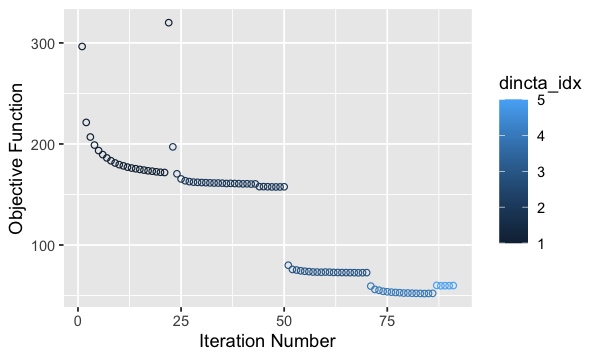

In [23]:
fig.size(3, 5)

R.cross.entropy.type = 'bc'
cell_type = "fake_cell_type"
frequency.update.Phi_C =rep(20,20,3,2)
dincta_partial_unknown_res <- dincta::DinctaMatrix(pca_embedding, meta_data, dataset, cell_type, do_pca = do_pca,
                                           theta.batch=theta.batch, mu=mu,
                                           sigma.entropy = sigma.entropy,
                                           sigma.cell_type = sigma.cell_type,
                                           verbose=verbose, plot_convergence = plot_convergence,
                                           R.cross.entropy.type = R.cross.entropy.type,
                                           return_object = return_object, alphas=alphas,
                                              refine.Phi_C = refine.Phi_C,
                                           frequency.update.Phi_C = frequency.update.Phi_C,
                                              n.cell_type.residual =n.cell_type.residual,
                                                          k_cluster.n.cells.outer.threshold =k_cluster.n.cells.outer.threshold,
k_cluster.n.cells.inner.threshold =k_cluster.n.cells.inner.threshold,
new.cell_type.prob.threshold=new.cell_type.prob.threshold,
cell_type.sample.fraction=cell_type.sample.fraction,
new.cell_type.main.fraction = new.cell_type.main.fraction,
cell_type.eigval.threshold=cell_type.eigval.threshold,
                                                      cell_type.min.cells=cell_type.min.cells,
                                              new.cell_type.min.cells=new.cell_type.min.cells,
                                                   centroid.cor.threshold =centroid.cor.threshold ,
                                           max.iter.dincta = max.iter.dincta,
                                              select.refine.fraction = select.refine.fraction ,
                                                   keep.known.cell_type = keep.known.cell_type,
    epsilon.cell_type.changed = epsilon.cell_type.changed)
dincta_partial_unknown_obj = dincta_partial_unknown_res[[1]]
dincta_partial_unknown_meta_data = dincta_partial_unknown_res[[2]]

In [24]:
fake_cell_type = rep("unknown", length(meta_data[["cell_type"]]))
meta_data[["fake_cell_type"]] = fake_cell_type

table(fake_cell_type)

fake_cell_type
unknown 
   9478 

Dincta 1/20

Dincta 2/20

Dincta 3/20

Dincta 4/20

Dincta 5/20

Dincta converged after 5 iterations



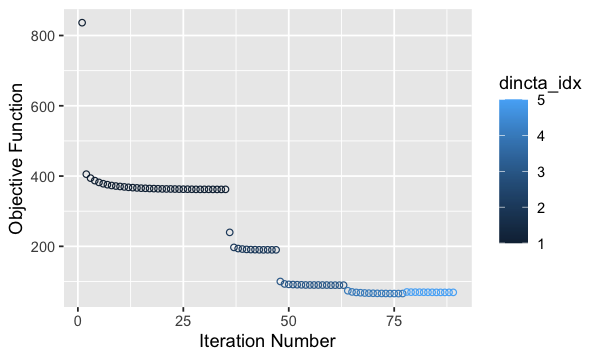

In [25]:
fig.size(3, 5)
# name dincta_[full|partial]_[bc|b]_obj

R.cross.entropy.type = 'bc'
cell_type = "fake_cell_type"
dincta_whole_unknown_res <- dincta::DinctaMatrix(pca_embedding, meta_data, dataset, cell_type, do_pca = do_pca,
                                           theta.batch=theta.batch, mu=mu,
                                           sigma.entropy = sigma.entropy,
                                           sigma.cell_type = sigma.cell_type,
                                           verbose=verbose, plot_convergence = plot_convergence,
                                           R.cross.entropy.type = R.cross.entropy.type,
                                           return_object = return_object, alphas=alphas,
                                              refine.Phi_C = refine.Phi_C,
                                              nclust = 100,
                                           frequency.update.Phi_C = frequency.update.Phi_C,
                                              n.cell_type.residual =n.cell_type.residual,
                                                          k_cluster.n.cells.outer.threshold =k_cluster.n.cells.outer.threshold,
k_cluster.n.cells.inner.threshold =k_cluster.n.cells.inner.threshold,
new.cell_type.prob.threshold=new.cell_type.prob.threshold,
cell_type.sample.fraction=cell_type.sample.fraction,
new.cell_type.main.fraction = new.cell_type.main.fraction,
cell_type.eigval.threshold=cell_type.eigval.threshold,
                                                      cell_type.min.cells=cell_type.min.cells,
                                              new.cell_type.min.cells=new.cell_type.min.cells,
                                                   centroid.cor.threshold =centroid.cor.threshold ,
                                           max.iter.dincta = max.iter.dincta,
                                             select.refine.fraction = select.refine.fraction ,
                                                   keep.known.cell_type = keep.known.cell_type,
    epsilon.cell_type.changed = epsilon.cell_type.changed)
dincta_whole_unknown_obj = dincta_whole_unknown_res[[1]]
dincta_whole_unknown_meta_data = dincta_whole_unknown_res[[2]]

Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony converged after 4 iterations



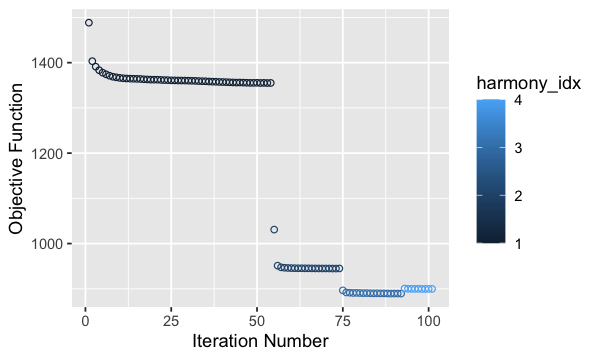

In [26]:
# Harmony
library(harmony)
fig.size(3, 5)
harmony_obj <- HarmonyMatrix(
    pca_embedding, 
    meta_data,
    dataset, 
    theta=theta.batch, 
    mu=mu,
    do_pca=do_pca, 
    plot_convergence=plot_convergence,
    return_object =T,
    max.iter.harmony = max.iter.dincta,
)
harmony_embedding = get_embedding(harmony_obj, pca_embedding)
harmony_umap <- do_umap(harmony_embedding)

Dincta 1/20

Dincta 2/20

Dincta 3/20

Dincta 4/20

Dincta 5/20

Dincta 6/20

Dincta 7/20

Dincta 8/20

Dincta 9/20

Dincta 10/20

Dincta converged after 10 iterations



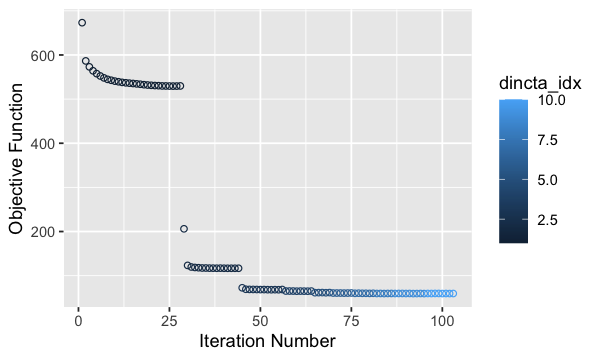

In [27]:
fig.size(3, 5)
# name dincta_[full|partial]_[bc|b]_obj
R.cross.entropy.type = 'bc'
cell_type = "cell_type"
dincta_whole_known_res <- dincta::DinctaMatrix(pca_embedding, meta_data, dataset, cell_type, do_pca = do_pca,
                                           theta.batch=theta.batch, mu=mu,
                                           sigma.entropy = sigma.entropy,
                                           sigma.cell_type = sigma.cell_type,
                                           verbose=verbose, plot_convergence = plot_convergence,
                                           R.cross.entropy.type = R.cross.entropy.type,
                                           return_object = return_object, alphas=alphas,
                                           frequency.update.Phi_C = frequency.update.Phi_C,
                                           max.iter.dincta = max.iter.dincta)
dincta_whole_known_obj = dincta_whole_known_res[[1]]
dincta_whole_known_meta_data = dincta_whole_known_res[[2]]

dincta_whole_known_embedding= get_embedding(dincta_whole_known_obj, pca_embedding)
dincta_whole_known_umap <- do_umap(dincta_whole_known_embedding)

In [28]:
dincta_partial_unknown_embedding= get_embedding(dincta_partial_unknown_obj, pca_embedding)
dincta_partial_unknown_umap <- do_umap(dincta_partial_unknown_embedding)

In [29]:
dincta_whole_unknown_embedding= get_embedding(dincta_whole_unknown_obj, pca_embedding)
dincta_whole_unknown_umap <- do_umap(dincta_whole_unknown_embedding)

In [30]:
table(as.character(dincta_partial_unknown_meta_data[["dataset"]]))
table(as.character(dincta_partial_unknown_meta_data[["cell_type"]]))
table(as.character(dincta_partial_unknown_meta_data[["fake_cell_type"]]))
table(as.character(dincta_partial_unknown_meta_data[["cell_type_predict"]]))

table(as.character(dincta_whole_unknown_meta_data[["cell_type_predict"]]))


  half jurkat   t293 
  3364   3255   2859 


jurkat   t293 
  5054   4424 


 jurkat unknown 
   3255    6223 


         jurkat new_cell_type_1 
           5026            4452 


new_cell_type_1 new_cell_type_2 
           5051            4427 

In [31]:
index = dincta_partial_unknown_meta_data[["cell_type_predict"]] == "unknown"
table(meta_data[["cell_type"]][index])

< table of extent 0 >

In [32]:

index = dincta_partial_unknown_meta_data[["cell_type_predict"]] == "new_cell_type_1"
table(meta_data[["cell_type"]][index])


jurkat   t293 
    28   4424 

In [33]:
index = dincta_partial_unknown_meta_data[["cell_type_predict"]] == "new_cell_type_2"
table(meta_data[["cell_type"]][index])

< table of extent 0 >

# LISI 

In [34]:
lisi_res <- rbind(
    lisi::compute_lisi(dincta_whole_known_embedding, meta_data, c('dataset', 'cell_type')) %>% 
        dplyr::mutate(type = 'dincta_whole_known'),
    lisi::compute_lisi(dincta_partial_unknown_embedding, meta_data, c('dataset', 'cell_type')) %>% 
        dplyr::mutate(type = 'dincta_partial_unknown'),
    lisi::compute_lisi(dincta_whole_unknown_embedding, meta_data, c('dataset', 'cell_type')) %>% 
        dplyr::mutate(type = 'dincta_whole_unknown'),
    lisi::compute_lisi(harmony_embedding, meta_data, c('dataset', 'cell_type')) %>% 
        dplyr::mutate(type = 'harmony'),
    lisi::compute_lisi(pca_embedding, meta_data, c('dataset', 'cell_type')) %>% 
        dplyr::mutate(type = 'pca')
) %>% 
    tidyr::gather(key, val, cell_type, dataset)

In [35]:
saveRDS(lisi_res,path_join(output_path,'lisi_res.rds'))

In [36]:
head(lisi_res)


,type,key,val
,<chr>,<chr>,<dbl>
1,dincta_whole_known,cell_type,1
2,dincta_whole_known,cell_type,1
3,dincta_whole_known,cell_type,1
4,dincta_whole_known,cell_type,1
5,dincta_whole_known,cell_type,1
6,dincta_whole_known,cell_type,1


In [37]:
lisi_sum(lisi_res)

,cell_type,dataset
dincta_whole_known,9507.055,16049.74
dincta_partial_unknown,9507.491,16048.45
dincta_whole_unknown,9507.028,16051.77
harmony,9533.455,16050.48
pca,9511.505,10916.09


In [38]:
options(digits = 5,continue = T)
lisi_res_table = round(lisi_mean_std(lisi_res),3)
lisi_res_table 


,cell_type mean,cell_type std,dataset mean,dataset std
dincta_whole_known,1.003,0.046,1.693,0.266
dincta_partial_unknown,1.003,0.046,1.693,0.266
dincta_whole_unknown,1.003,0.046,1.694,0.266
harmony,1.006,0.064,1.693,0.272
pca,1.004,0.049,1.152,0.262


In [39]:
type =lisi_res$type
type_new=type
type_new[type =="dincta_whole_known"] ="dincta_w_k"
type_new[type =="dincta_partial_unknown"] ="dincta_p_u"
type_new[type =="dincta_whole_unknown"] ="dincta_w_u"
lisi_res$type_new = type_new

Warning message:
“Removed 35 rows containing non-finite values (stat_density).”
Warning message:
“Removed 35 rows containing non-finite values (stat_density).”
Warning message:
“Removed 35 rows containing non-finite values (stat_density).”


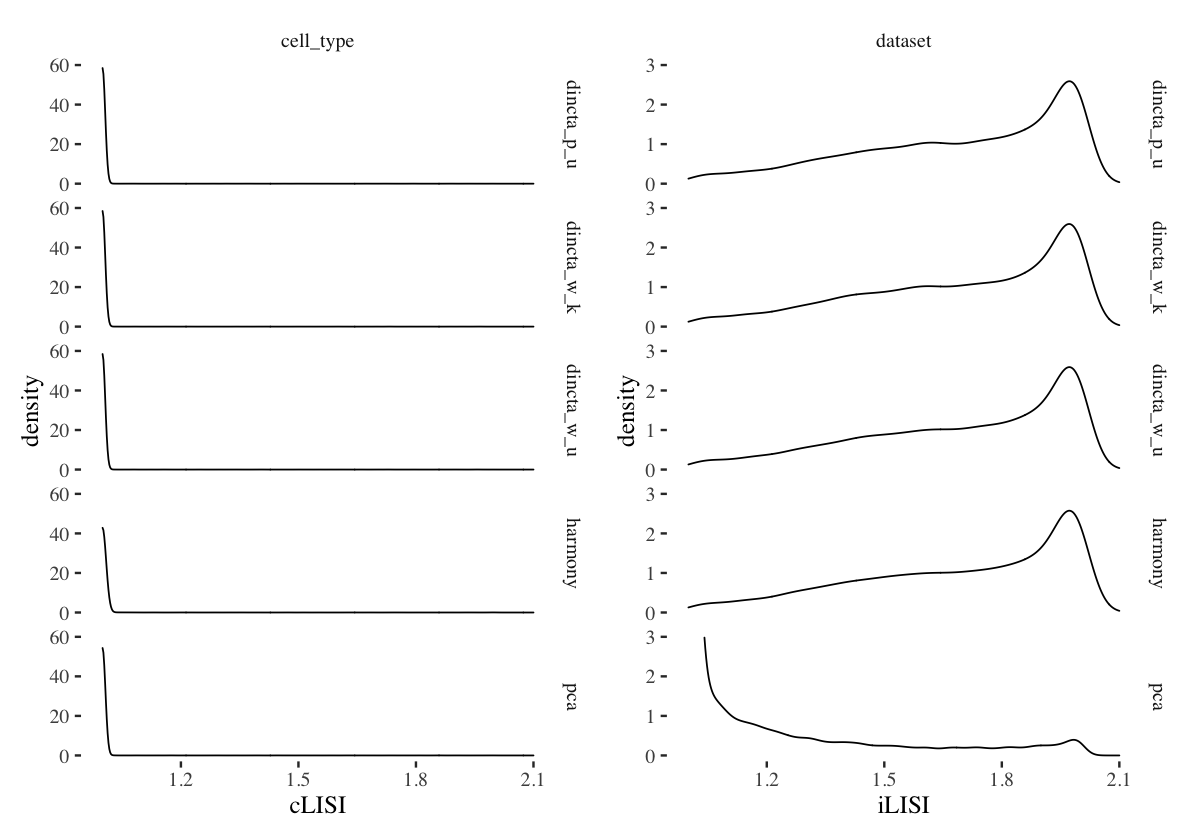

In [64]:
fig.size(7, 10)

pc = lisi_res %>% subset(key=="cell_type")%>% 
    ggplot(aes(val)) + 
        geom_density() + 
#facet_wrap(~type + key, scales = 'free') +
facet_grid(vars(type_new), vars(key), scales = 'free',space="free_y", margins = "vs")+
#  facet_grid(rows = vars(type))+
#facet_grid(cols = vars(key))+
#         facet_wrap(~type + key, scales = 'free') + 
        theme_tufte(base_size = 15) +
        xlim(1, 2.1) +
        ylim(0,60) +  labs(x = "cLISI")

pd = lisi_res %>% subset(key=="dataset")%>% 
    ggplot(aes(val)) + 
        geom_density() + 
# facet_wrap(~type + key, scales = 'free') +
facet_grid(vars(type_new), vars(key), scales = 'free',
           space="free_y",
           margins = "vs"
          )+
#  facet_grid(rows = vars(type))+
#facet_grid(cols = vars(key))+
#         facet_wrap(~type + key, scales = 'free') + 
        theme_tufte(base_size = 15) +
        xlim(1, 2.1) +
        ylim(0,3) +  labs(x = "iLISI")
pc+ pd+guides(col = FALSE, fill = FALSE)
ggsave(path_join(output_path,'lisi_res.eps'), device = "eps",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 7, dpi = 600, limitsize = TRUE)
ggsave(path_join(output_path,'lisi_res.pdf'), device = "pdf",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 7, dpi = 600, limitsize = TRUE)

# Figures

In [42]:
colors_use <- c(`jurkat` = paste0("#", paste0(toupper(as.hexmode(c(129, 15, 124))), collapse = "")),
  `t293` = paste0("#", paste0(toupper(as.hexmode(c(208, 158, 45))), collapse = "")),
   `half` = paste0("#", paste0(toupper(as.hexmode(c(0, 109, 44))), collapse = "")),
                `unknown`    = paste0("#", paste0(toupper(as.hexmode(c(129, 129, 129))), collapse = "")),
                `new_cell_type_1`    = paste0("#", paste0(toupper(as.hexmode(c(16, 0, 253))), collapse = "")),
                `new_cell_type_2`    = paste0("#", paste0(toupper(as.hexmode(c(16, 253, 0))), collapse = "")),
                `new_cell_type_3`    = paste0("#", paste0(toupper(as.hexmode(c(166, 0, 0))), collapse = "")),
                `new_cell_type_4`    = paste0("#", paste0(toupper(as.hexmode(c(166, 166, 0))), collapse = "")),
                `new_cell_type_5`    = paste0("#", paste0(toupper(as.hexmode(c(166, 0, 166))), collapse = "")),
                `new_cell_type_6`    = paste0("#", paste0(toupper(as.hexmode(c(0, 166, 166))), collapse = "")),
                `new_cell_type_7`    = paste0("#", paste0(toupper(as.hexmode(c(80, 0, 0))), collapse = "")),
                `new_cell_type_8`    = paste0("#", paste0(toupper(as.hexmode(c(0, 80, 0))), collapse = "")),
                `new_cell_type_9`    = paste0("#", paste0(toupper(as.hexmode(c(0, 0, 80))), collapse = ""))
               )
colors_white = c(`white_1`   = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_2`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_3`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_4`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_5`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_6`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_7`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_8`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")),
                `white_9`    = paste0("#", paste0(toupper(as.hexmode(c(253, 253, 253))), collapse = "")))
colors_use_total = colors_use

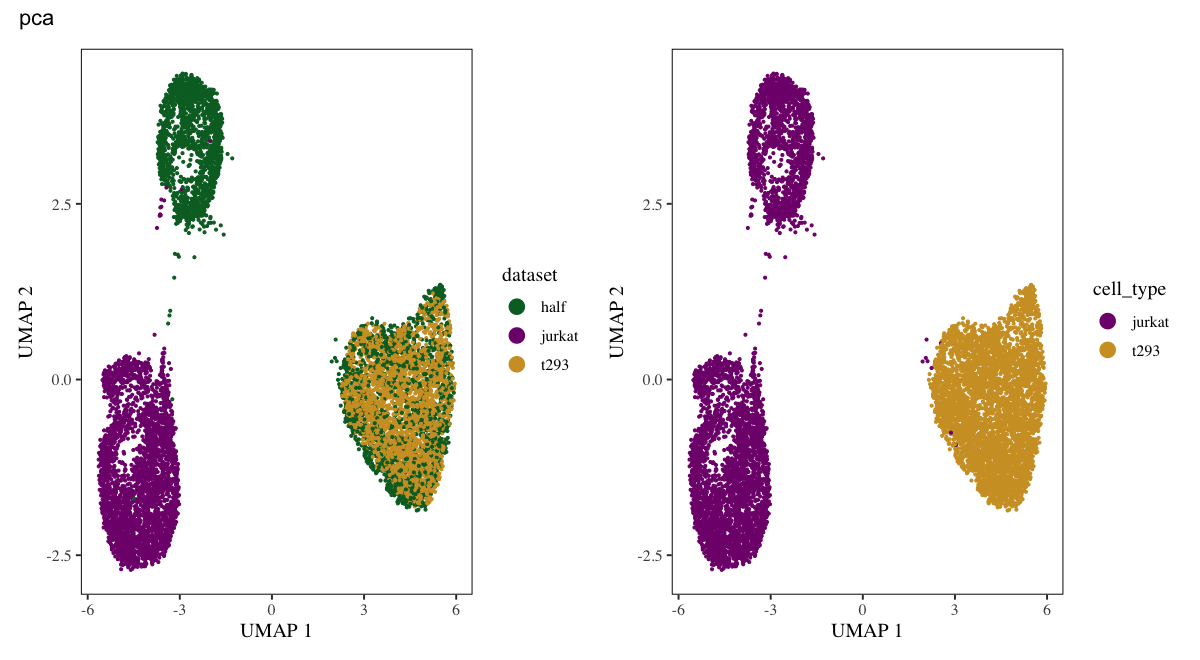

In [43]:
fig.size(5.5, 10)
do_scatter(pca_umap, meta_data, 'dataset', palette_use = colors_use, pt_shape = 21, pt_size = .2) + 
do_scatter(pca_umap, meta_data, 'cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .2) + 
plot_annotation(title = 'pca')
#ggsave(path_join(output_path,'pca.eps'), device = "eps",fonts=c("serif", "Palatino"),
#       scale = 1, width = 5, height = 12, units =  "cm", dpi = 600, limitsize = TRUE)
ggsave(path_join(output_path,'pca.eps'), device = "eps",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 5.5, dpi = 600, limitsize = TRUE)
ggsave(path_join(output_path,'pca.pdf'), device = "pdf",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 5.5, dpi = 600, limitsize = TRUE)

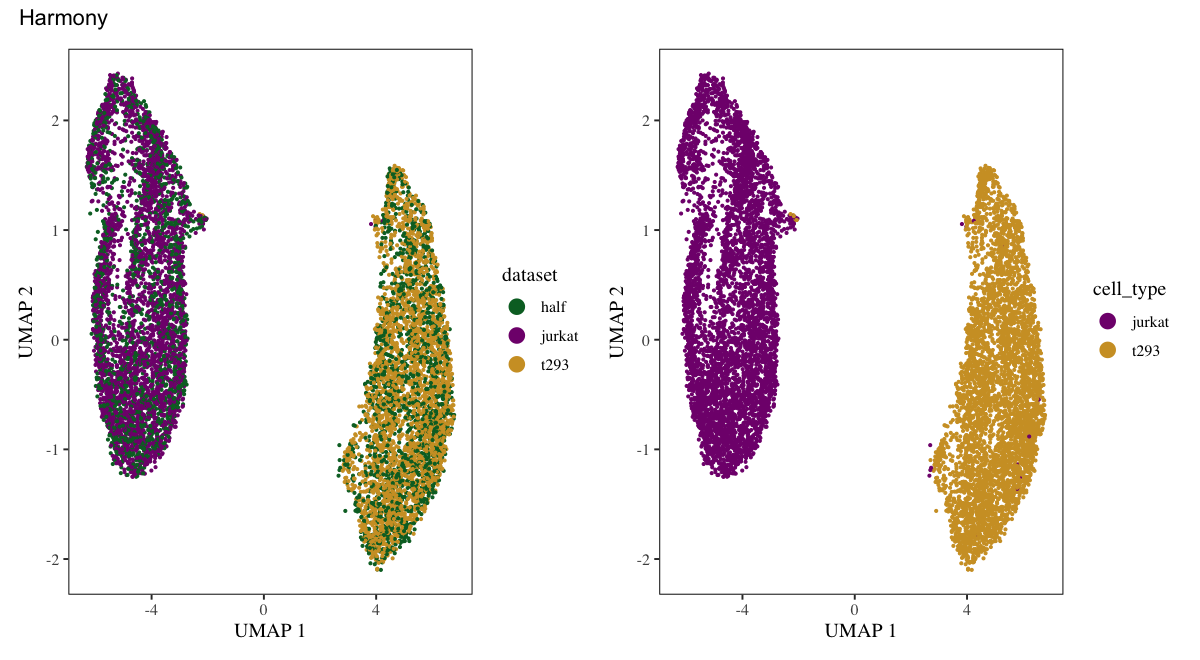

In [44]:
fig.size(5.5, 10)
do_scatter(harmony_umap, meta_data, 'dataset', palette_use = colors_use, pt_shape = 21, pt_size = .2) + 
do_scatter(harmony_umap, meta_data, 'cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .2) + 
plot_annotation(title = 'Harmony')
ggsave(path_join(output_path,'harmony.eps'), device = "eps",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 5.5, dpi = 600, limitsize = TRUE)
ggsave(path_join(output_path,'harmony.pdf'), device = "pdf",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 5.5, dpi = 600, limitsize = TRUE)

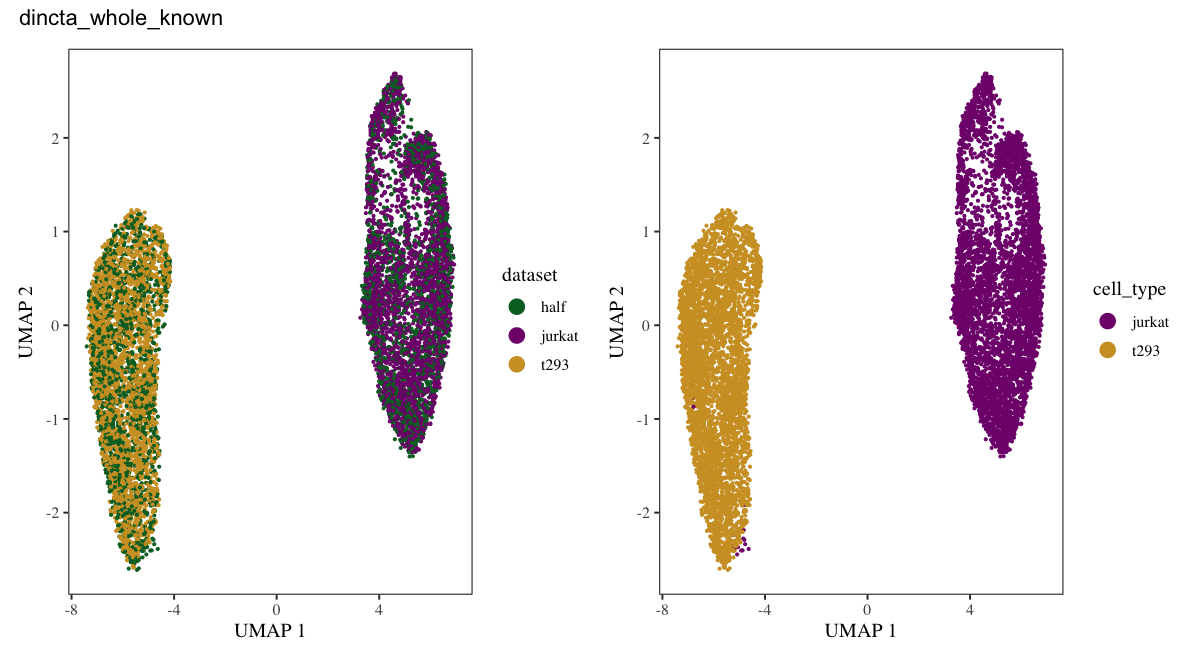

In [45]:
fig.size(5.5, 10)
do_scatter(dincta_whole_known_umap, meta_data, 'dataset', palette_use = colors_use, pt_shape = 21, pt_size = .2) + 
do_scatter(dincta_whole_known_umap, meta_data, 'cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .2) + 
plot_annotation(title = 'dincta_whole_known')
ggsave(path_join(output_path,'dincta_whole_known.eps'), device = "eps",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 5.5, dpi = 600, limitsize = TRUE)
ggsave(path_join(output_path,'dincta_whole_known.pdf'), device = "pdf",fonts=c("serif", "Palatino"),
       scale = 1, width = 10, height = 5.5, dpi = 600, limitsize = TRUE)

In [46]:
colors_use

jurkat            t293            half         unknown new_cell_type_1 
      "#810F7C"       "#D09E2D"       "#006D2C"       "#818181"       "#1000FD" 
new_cell_type_2 new_cell_type_3 new_cell_type_4 new_cell_type_5 new_cell_type_6 
      "#10FD00"       "#A60000"       "#A6A600"       "#A600A6"       "#00A6A6" 
new_cell_type_7 new_cell_type_8 new_cell_type_9 
      "#500000"       "#005000"       "#000050"

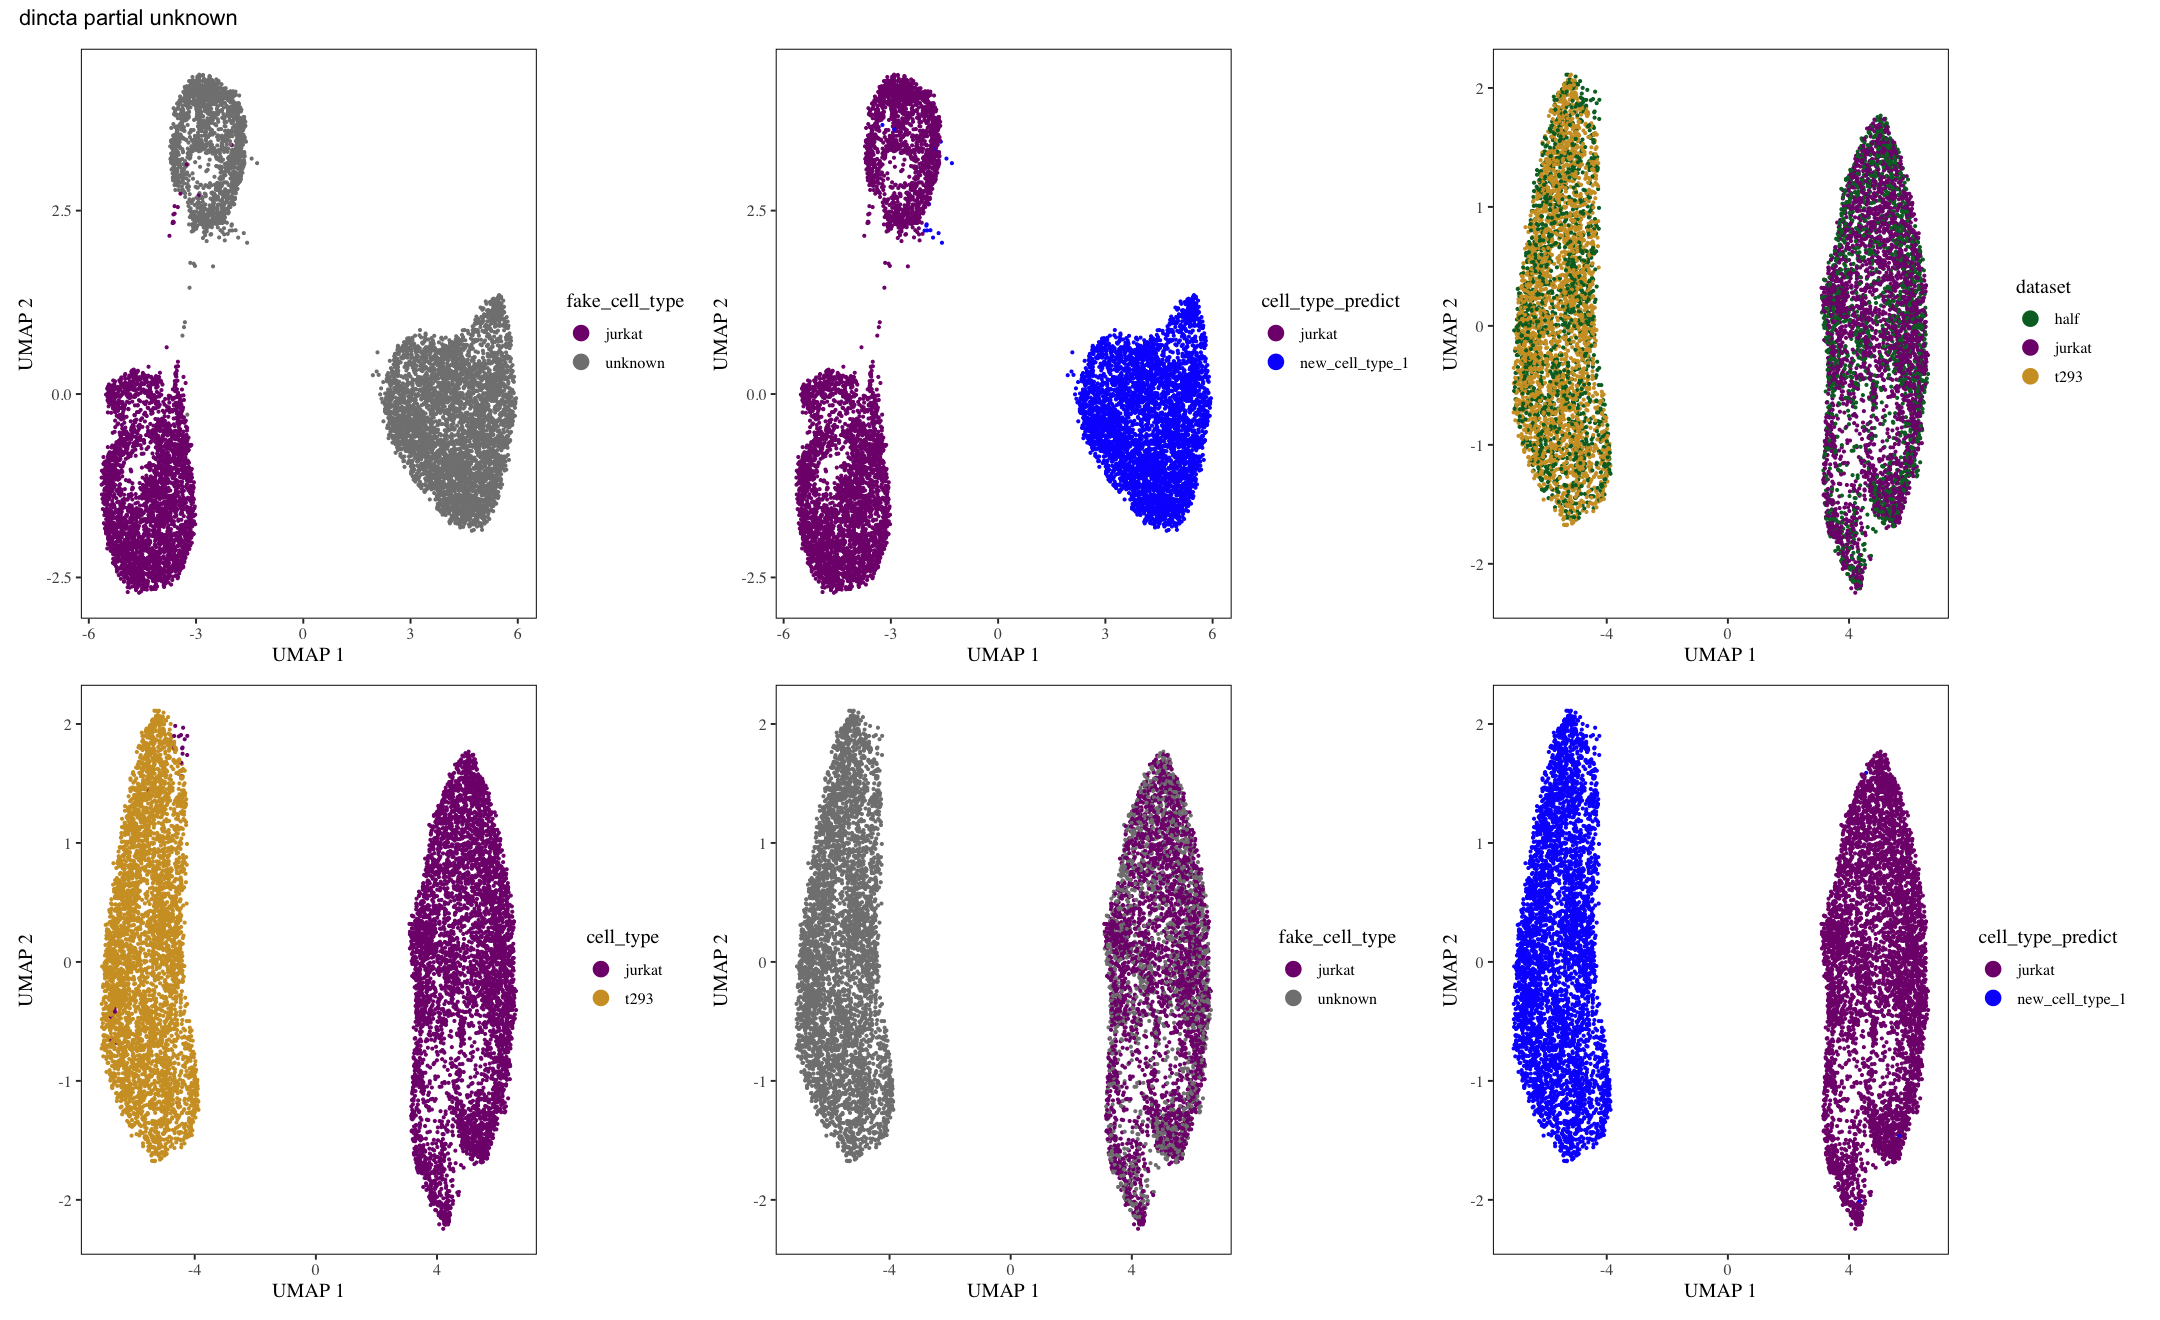

In [47]:
fig.size(11, 18)
do_scatter(pca_umap, dincta_partial_unknown_meta_data, 'fake_cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(pca_umap, dincta_partial_unknown_meta_data, 'cell_type_predict', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_partial_unknown_umap, dincta_partial_unknown_meta_data, 'dataset', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_partial_unknown_umap, dincta_partial_unknown_meta_data, 'cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_partial_unknown_umap, dincta_partial_unknown_meta_data, 'fake_cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_partial_unknown_umap, dincta_partial_unknown_meta_data, 'cell_type_predict', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
plot_annotation(title = 'dincta partial unknown')
# ggsave(path_join(output_path,'dincta_partial_bc_whole_unknown.eps'), device = "eps",fonts=c("serif", "Palatino"),
#        scale = 1, width = 12, height = 5, dpi = 1800, limitsize = F)
ggsave(path_join(output_path,'dincta_partial_unknown.eps'), device = "eps",fonts=c("serif", "Palatino"),
       scale = 1, width = 18, height = 11, dpi = 600, limitsize = F)
ggsave(path_join(output_path,'dincta_partial_unknown.pdf'), device = "pdf",fonts=c("serif", "Palatino"),
       scale = 1, width = 18, height = 11, dpi = 600, limitsize = F)

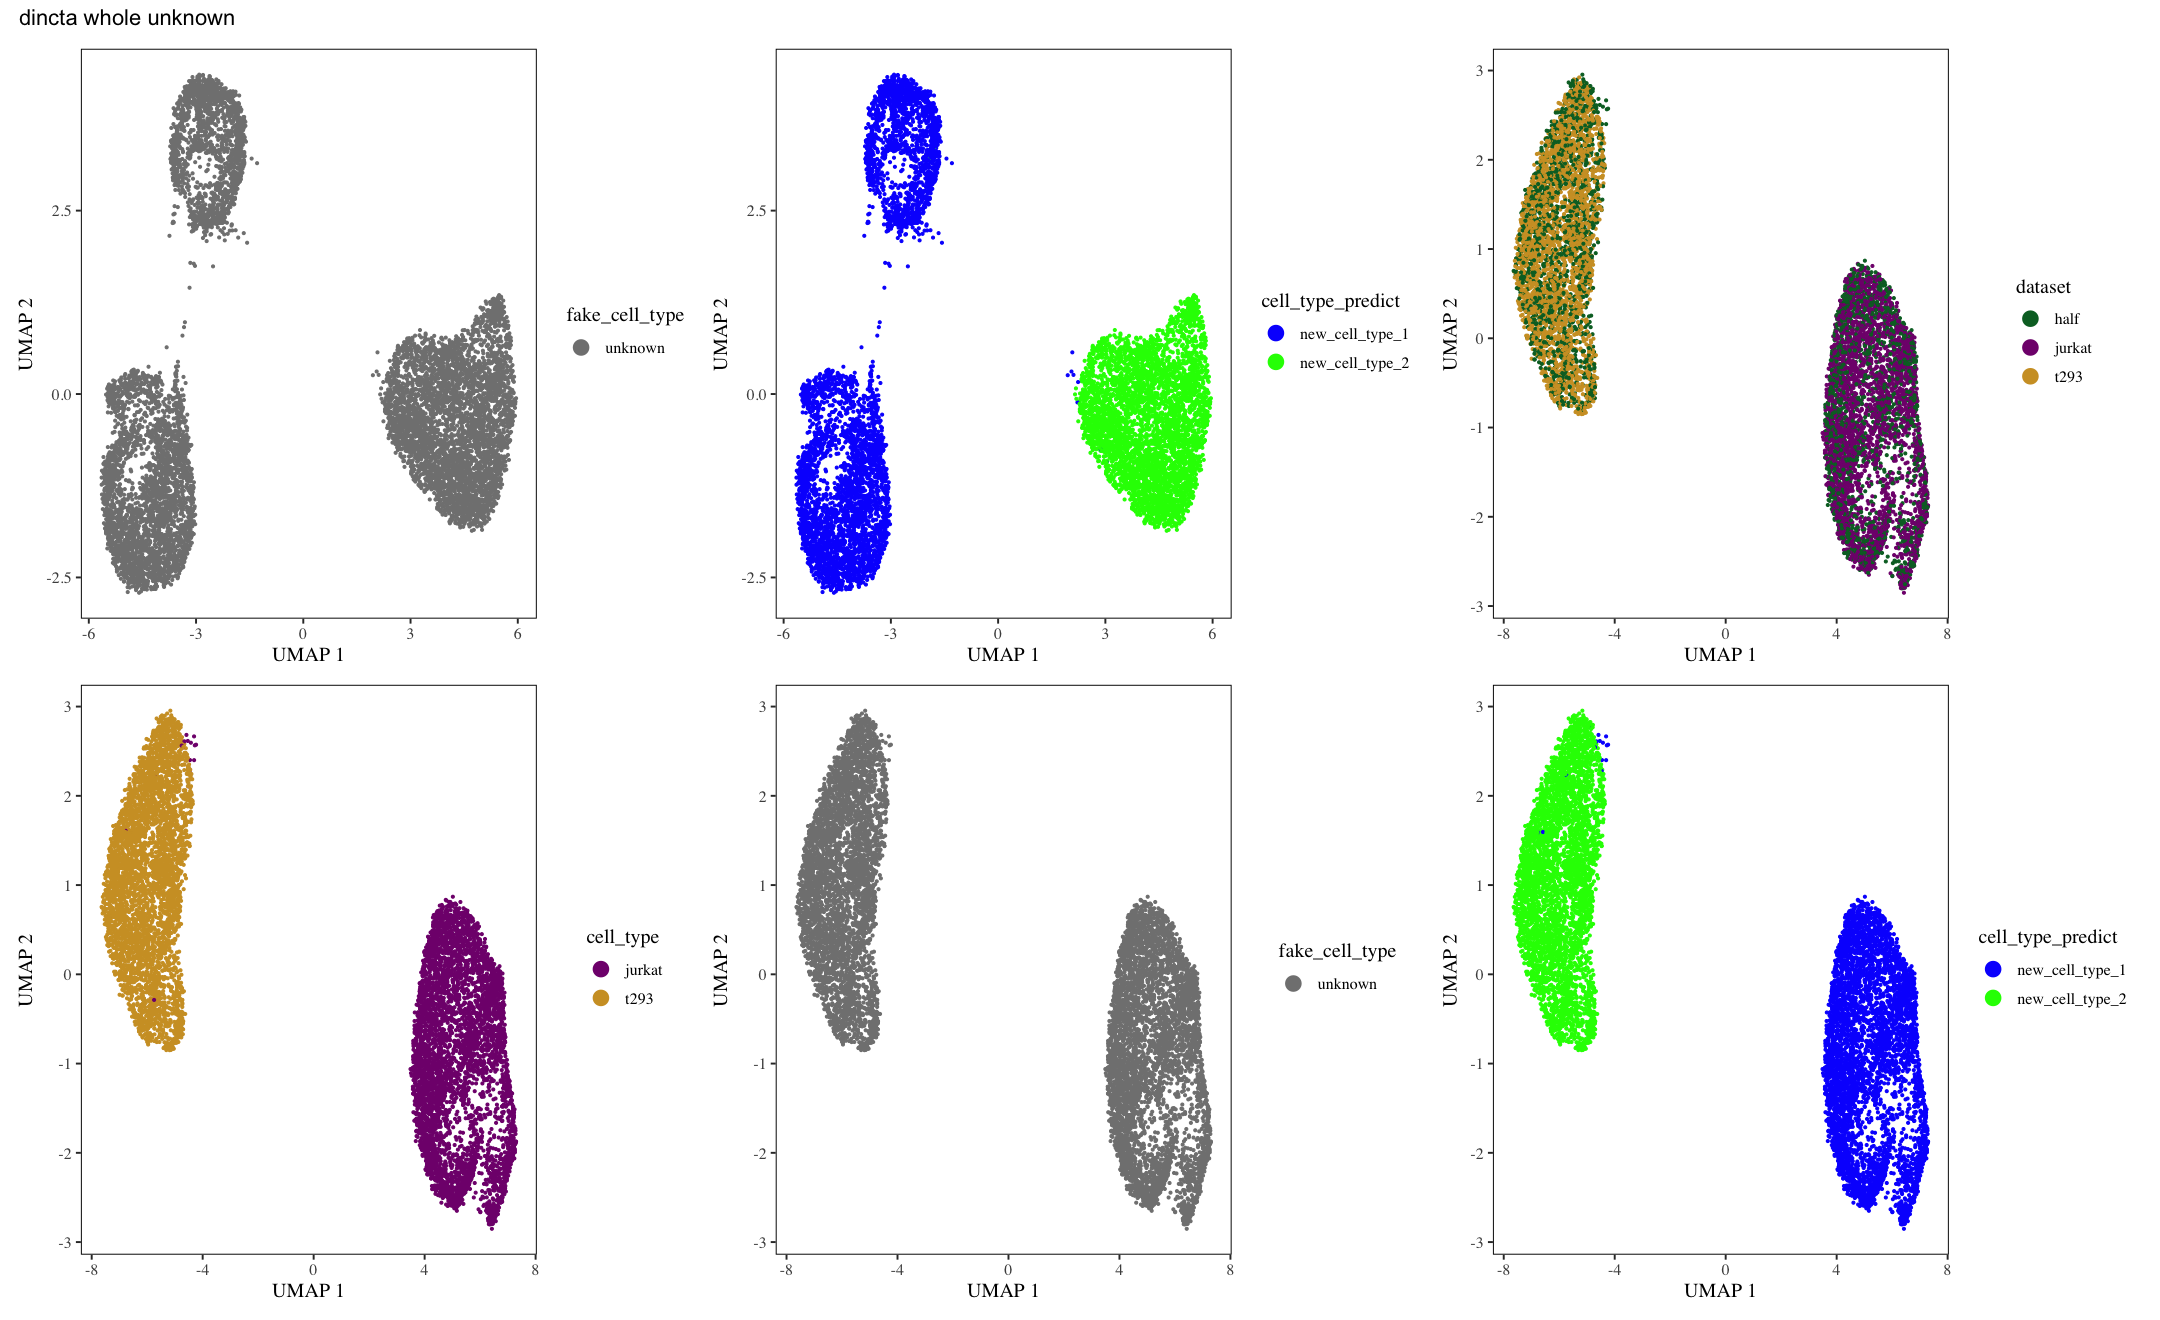

In [48]:
fig.size(11, 18)
do_scatter(pca_umap, dincta_whole_unknown_meta_data, 'fake_cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(pca_umap, dincta_whole_unknown_meta_data, 'cell_type_predict', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_whole_unknown_umap, dincta_whole_unknown_meta_data, 'dataset', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_whole_unknown_umap, dincta_whole_unknown_meta_data, 'cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_whole_unknown_umap, dincta_whole_unknown_meta_data, 'fake_cell_type', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
do_scatter(dincta_whole_unknown_umap, dincta_whole_unknown_meta_data, 'cell_type_predict', palette_use = colors_use, pt_shape = 21, pt_size = .001) + 
plot_annotation(title = 'dincta whole unknown')
# ggsave(path_join(output_path,'dincta_partial_bc_whole_unknown.eps'), device = "eps",fonts=c("serif", "Palatino"),
#        scale = 1, width = 12, height = 5, dpi = 1800, limitsize = F)
ggsave(path_join(output_path,'dincta_whole_unknown.eps'), device = "eps",fonts=c("serif", "Palatino"),
       scale = 1, width = 18, height = 11, dpi = 600, limitsize = F)
ggsave(path_join(output_path,'dincta_whole_unknown.pdf'), device = "pdf",fonts=c("serif", "Palatino"),
       scale = 1, width = 18, height = 11, dpi = 600, limitsize = F)

In [49]:
Phi_C = t(onehot(meta_data[['cell_type']]))
dim(Phi_C)
head(Phi_C)

[1]    2 9478

jurkat,0,1,1,1,1,0,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
t293,1,0,0,0,0,1,0,0,0,1,⋯,1,1,1,1,1,1,1,1,1,1


In [50]:
objs =list()
objs$harmony = harmony_obj
objs$dincta_whole_known = dincta_whole_known_obj
objs$dincta_partial_unknown = dincta_partial_unknown_obj
objs$dincta_whole_unknown = dincta_whole_unknown_obj

In [51]:
summary_entropy_error_table = summary_entropy_error(objs,Phi_C) 
summary_entropy_error_table

type,fro_cluster_error_loss
<fct>,<dbl>
harmony,127.9918
dincta_whole_known,36.0621
dincta_partial_unknown,7.4561
dincta_whole_unknown,27.0234


In [52]:
summary_accuracy_table = summary_accuracy(objs,Phi_C)
summary_accuracy_table 

type,accuracy,correct type,total number of cells
<fct>,<dbl>,<dbl>,<dbl>
harmony,0.99620,9442,9478
dincta_whole_known,0.99926,9471,9478
dincta_partial_unknown,0.99979,9476,9478
dincta_whole_unknown,0.99947,9473,9478


In [53]:
meta_data = dincta_partial_unknown_meta_data
Psi_C = dincta_partial_unknown_res$Phi_C
print("dincta_partial_unknown")
infer_accuracy_p_u = infer_accuracy(meta_data, Psi_C, Phi_C)
infer_accuracy_p_u

[1] "dincta_partial_unknown"
[1] "There is a tie for predict type  2  chose to map to  1"


[1]    0.99705 9450.00000 9478.00000

In [54]:
meta_data = dincta_whole_unknown_meta_data
Psi_C = dincta_whole_unknown_res$Phi_C
print("dincta_whole_unknown")
infer_accuracy_w_u = infer_accuracy(meta_data, Psi_C, Phi_C)
infer_accuracy_w_u 

[1] "dincta_whole_unknown"
[1] "There is a tie for predict type  1  chose to map to  2"


[1]    0.99947 9473.00000 9478.00000

In [55]:
infer_accuracy_R_summary_table = infer_accuracy_R_summary(
    objs,Phi_C,eigval_threshold = 0.96,n.cell_type.min.cells = 50,fix_C = F)
infer_accuracy_R_summary_table 

[1] "dincta_whole_known : C is  2 C_ is  3"
[1] "dincta_whole_known :C_new is  2 C_ is  3"
[1] "dincta_partial_unknown : C is  2 C_ is  3"
[1] "dincta_partial_unknown :C_new is  2 C_ is  3"


,accuracy,number.of.correct.cells,number.of.total.cells
,<dbl>,<dbl>,<dbl>
harmony,0.99420,9423,9478
dincta_whole_known,0.99778,9457,9478
dincta_partial_unknown,0.99705,9450,9478
dincta_whole_unknown,0.99789,9458,9478


In [58]:
lisi_res_table 
summary_entropy_error_table
infer_accuracy_p_u 
infer_accuracy_w_u 
infer_accuracy_R_summary_table 

,cell_type mean,cell_type std,dataset mean,dataset std
dincta_whole_known,1.003,0.046,1.693,0.266
dincta_partial_unknown,1.003,0.046,1.693,0.266
dincta_whole_unknown,1.003,0.046,1.694,0.266
harmony,1.006,0.064,1.693,0.272
pca,1.004,0.049,1.152,0.262


type,fro_cluster_error_loss
<fct>,<dbl>
harmony,127.9918
dincta_whole_known,36.0621
dincta_partial_unknown,7.4561
dincta_whole_unknown,27.0234


[1]    0.99705 9450.00000 9478.00000

[1]    0.99947 9473.00000 9478.00000

,accuracy,number.of.correct.cells,number.of.total.cells
,<dbl>,<dbl>,<dbl>
harmony,0.99420,9423,9478
dincta_whole_known,0.99778,9457,9478
dincta_partial_unknown,0.99705,9450,9478
dincta_whole_unknown,0.99789,9458,9478


In [59]:
save(lisi_res, meta_data, pca_embedding, pca_umap, 
harmony_embedding, harmony_umap,
dincta_whole_unknown_meta_data, dincta_whole_unknown_embedding, dincta_whole_unknown_umap,
dincta_partial_unknown_meta_data, dincta_whole_unknown_embedding, dincta_whole_unknown_umap,
 dincta_whole_known_embedding, dincta_whole_known_umap,
file=path_join(output_path, "output_data.RData"))
     
     
     
     

In [60]:
save(lisi_res_table,
summary_entropy_error_table,
infer_accuracy_p_u,
infer_accuracy_w_u,
infer_accuracy_R_summary_table,
     file=path_join(output_path, "output_table.RData"))

In [61]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] presto_1.0.0            lisi_1.0                ggrepel_0.8.2          
 [4] patchwork_1.0.1         ggthemes_4.2.0          singlecellmethods_0.1.0
 [7] harmony_0.99.9          forcats_0.5.0           stringr_1.4.0          
[10] dplyr_1.0.2             purrr_0.3.4             readr_1.3.1            
[13] tidyr_1.1.2             tibble_3.0.4            ggplot2_3.3.2          
[16] tidyverse_1.3.0         data.table_1.12.8       dincta_0.1.0           
[19] Rcpp_1.0.5             

loaded via a namespace (and not attached):
 [1] 